# Análisis de datos LoveMatch

Previo a realizar cualquier descricpción estadística, es necesario manipular los datos obtenidos en el modelo y agente ya que se presenta un problema de pérdida de información.

En primer lugar, al momento de realizar el match, las parejas salen del modelo y del grid. Sin embargo, se llevan con ellos toda la información asociada a sus características. Por lo tanto, la información que necesitamos para comparar entre individuos se va con ellos. 

Sin embargo, es posible recuperar la información sobre quién se emparejó y quién no con la información de la paciencia (time_to_critical) así como la del número de steps sin encontrar pareja (sojourn), si tomamos en cuenta la diferencia entre estas dos variables podemos distinguir quienes dejaron el modelo (time - soj = 1) de aquellos que realizaron su match en su intervalo de paciencia individual (time- - soj != 1).

Para estimar quienes son parejas y quienes se fueron sin match, es necesario agrupar los datos, obtener el valor máximo de sojourn y compararlo con el tiempo crítico. Una vez obtenido esta serie, la agregamos al DataFrame final y con este, ya es posible filtrar quienes tuvieron pareja y quienes no. Con esta información tomada en cuenta, es posible realizar estadística descriptiva para cada grupo.

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
pd.set_option('display.max_rows',5279)

In [ ]:
##### Importar bases de datos para agentes y el modelo ########

In [178]:
info_agentes = pd.read_csv("a_good.csv")

In [179]:
info_modelo = pd.read_csv("m_good.csv")

In [134]:
#### Con soj y time encontramos los datos sobre la paciencia y el tiempo máximo de esta por agente (los datos se agruparon) #####

In [194]:
soj = info_agentes.groupby('myid')['sojourn'].max()  

In [195]:
time = info_agentes.groupby('myid')['time_to_critical'].max()

In [ ]:
### La diferencia en el tiempo nos dice si se emparejaron o no. Si es igual a 1, entonces el tiempo que estuvo es igual a su tiempo máximo de espera. #####

In [196]:
par = time - soj

In [96]:
#### Ahora agrupamos el dataframe por agentes para obtener características en un periodo fijo ####

In [199]:
data = info_agentes.groupby(['myid'])[['gender','wealth', 'beauty','desired_beauty','desired_wealth','time_to_critical']]

In [ ]:
#### convertimos el objeto de grouby a dataframe para futuras manipulaciones ####

In [200]:
data = data.first()

In [ ]:
#### agregamos la serie obtenida al dataframe de agentes para poder separar a los individuos emparejados de los solteros#####

In [201]:
df = data.assign(estatus= par) 

In [ ]:
#### Creamos filtros para los distintos tipos de estatus ####

In [202]:
is_single = df['estatus'] == 1

In [203]:
is_match = df['estatus'] != 1

In [ ]:
###### Creamos dos dataframes separados por estatus, una vez aplicado el filtro #######

In [204]:
solteros = df[is_single]

In [205]:
parejas = df[is_match]

In [ ]:
####### ESTADISTICA DESCRIPTIVA #######

In [206]:
solteros.describe()

,gender,wealth,beauty,desired_beauty,desired_wealth,time_to_critical,estatus
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.0
mean,0.452555,2.799203,2.828658,1.992519,2.170311,20.664234,1.0
std,0.499570,0.865767,0.896364,1.241689,1.617837,5.941229,0.0
min,0.000000,1.272594,1.177652,0.380680,0.383497,10.000000,1.0
25%,0.000000,2.185351,2.163211,1.164675,1.144102,16.000000,1.0
50%,0.000000,2.587520,2.690455,1.790116,1.704894,21.000000,1.0
75%,1.000000,3.361149,3.183893,2.417163,2.602130,26.000000,1.0
max,1.000000,5.663930,6.327872,6.965646,10.319424,30.000000,1.0


In [207]:
parejas.describe()

,gender,wealth,beauty,desired_beauty,desired_wealth,time_to_critical,estatus
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.500000,2.833201,2.862049,1.751438,1.719828,20.500000,16.147059
std,0.502469,0.865140,0.724692,0.947610,1.201313,5.891343,6.617404
min,0.000000,1.065940,1.429026,0.532342,0.429554,10.000000,5.000000
25%,0.000000,2.227705,2.327961,1.028551,0.945649,16.000000,11.000000
50%,0.500000,2.791479,2.778274,1.469285,1.402154,20.000000,16.000000
75%,1.000000,3.240542,3.302469,2.285345,2.030806,25.000000,21.000000
max,1.000000,6.018012,5.304088,4.804634,7.320382,30.000000,31.000000


In [209]:
solteros.groupby('gender')['estatus'].count()

gender
0    75
1    62
Name: estatus, dtype: int64

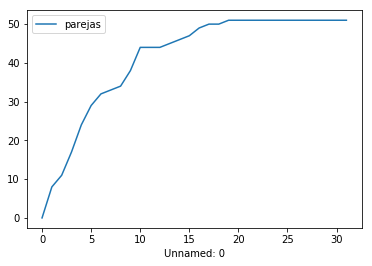

In [223]:
info_modelo.plot(x = 'Unnamed: 0', y = 'parejas')

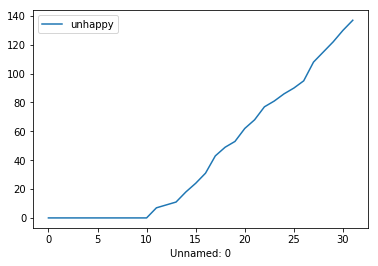

In [226]:
info_modelo.plot(x = 'Unnamed: 0', y = 'unhappy')

C:\Users\edari\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


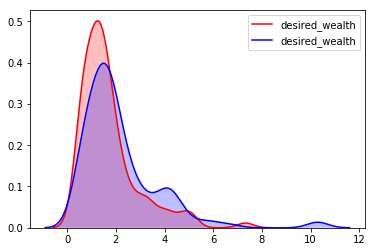

In [212]:
p1 = sns.kdeplot(parejas['desired_wealth'], shade= True, color = 'r')
p2 = sns.kdeplot(solteros['desired_wealth'], shade = True, color = 'b')


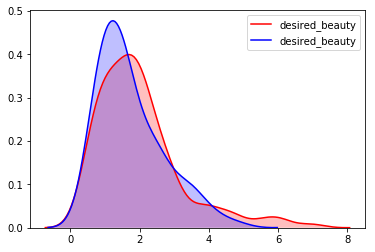

In [213]:
p3 = sns.kdeplot(parejas['desired_beauty'], shade = True, color = 'r')
p4 = sns.kdeplot(solteros['desired_beauty'], shade = True, color = 'b')

C:\Users\edari\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


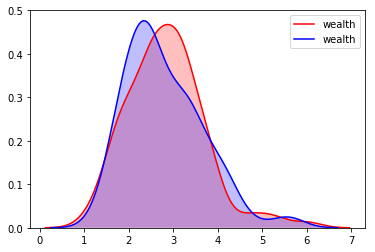

In [215]:
p5 = sns.kdeplot(parejas['wealth'], shade= True, color = 'r')
p6 = sns.kdeplot(solteros['wealth'], shade = True, color = 'b')


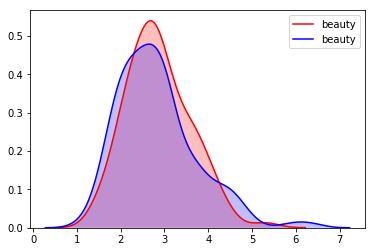

In [216]:
p7 = sns.kdeplot(parejas['beauty'], shade = True, color = 'r')
p8 = sns.kdeplot(solteros['beauty'], shade = True, color = 'b')

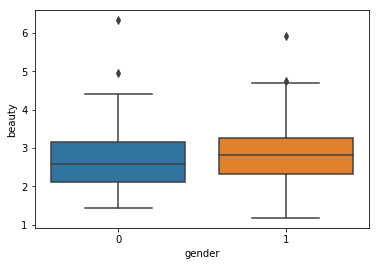

In [217]:
 sns.boxplot(x="gender", y="beauty", data=solteros)

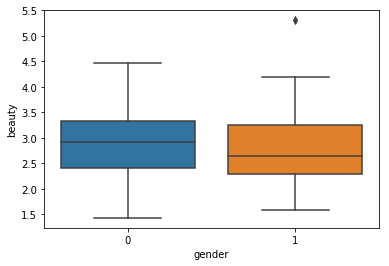

In [218]:
 sns.boxplot(x="gender", y="beauty", data=parejas)

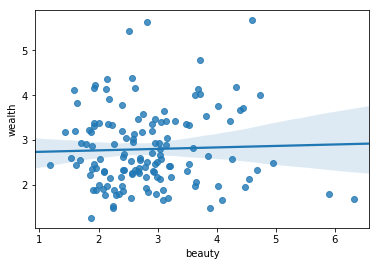

In [219]:
 sns.regplot(x="beauty",
 y="wealth",
 data=solteros)

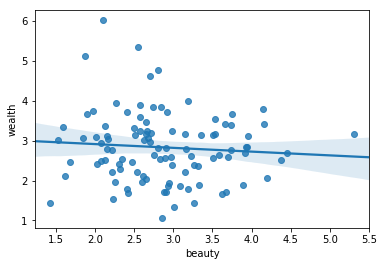

In [220]:
 sns.regplot(x="beauty",
 y="wealth",
 data=parejas)

In [ ]:
sns.scatterplot(x = data.first()['time_to_critical'], y = data.first()['wealth'], hue= data.first()['gender'])

In [ ]:
sns.distplot(flights['arr_delay'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})